# Regresión

Vamos a trabajar con un dataset sobre precios de casas en boston:

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000’s

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
boston_data = fetch_openml(name='boston', version=1)
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


¿ Hay nulos ?

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

Imprimir descripción del dataset:

In [ ]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


¿ Hay variables correlacionadas entre sí ?

<ipython-input-5-f49a823510d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
<ipython-input-5-f49a823510d5>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,


<Axes: >

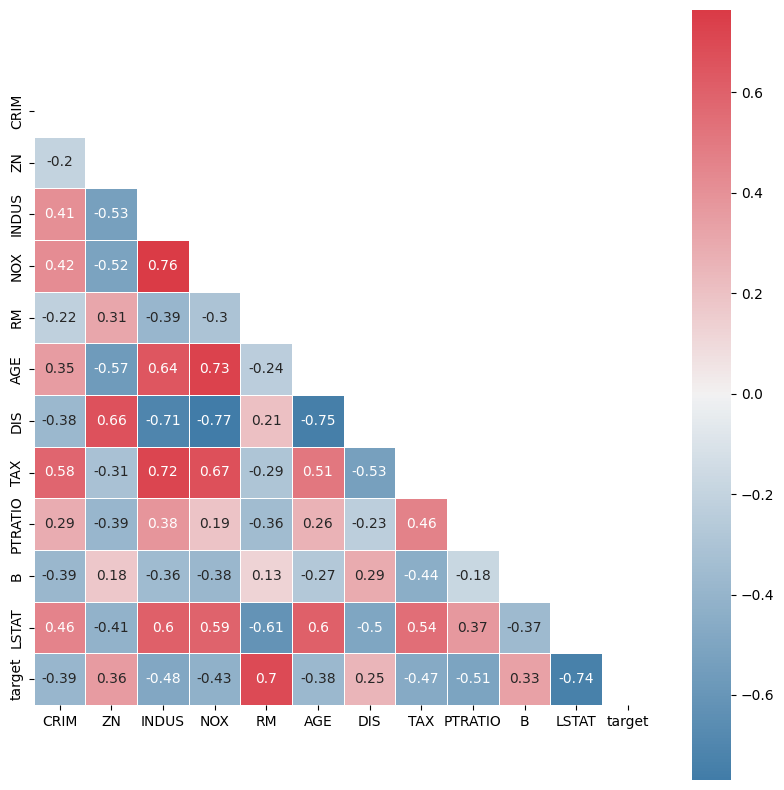

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)
# El R cuadrado ajusto corrije la colinealidad de las variables explicativas, hay que usar ese.

En OLS no es bueno poner variables que esten correlacionadas entre sí.

Por lo tanto, descartemos las variables que tienen una alta correlación (más de 0.9) y nos quedemos con 1 sola de ellas:

In [ ]:
df = df.drop(["TAX"], axis=1)

¿ Cómo se distribuye nuestro target ?

<Axes: xlabel='target', ylabel='Count'>

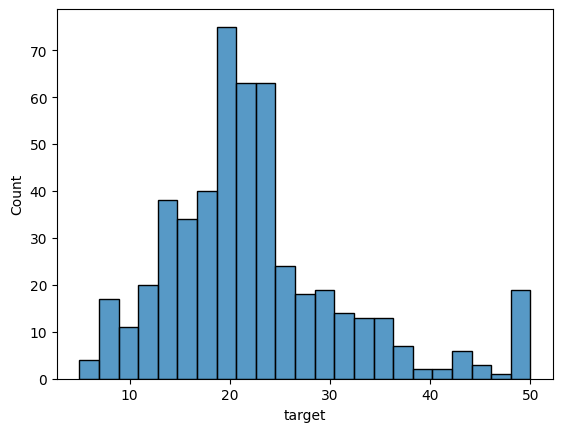

In [ ]:
sns.histplot(data=df, x="target")

# Train - Test split

Ahora, vamos a comenzar entrenando un modelo de regresión lineal de sklearn. Primero que nada, separemos en train - test.

Dejemos un 20% de los datos reservados para test y un random_state=42 para obtener todos los mismos resultados:

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["target"], axis=1)
y = df["target"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


# Linear regression

Comenzaremos implementando una regresión lineal simple, utilizando Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

En principio seleccionemos 1 sola variable como feature (puede ser por ejemplo, la que tenía la correlación más fuerte con el target)

In [ ]:
X_train_1 = X_train[["LSTAT"]].copy()
X_test_1 = X_test[["LSTAT"]].copy()

Importamos LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

Entrenamos el modelo:

In [ ]:
reg = LinearRegression().fit(X_train_1 , y_train)

Y validamos su score en train y en test (si se fijan en la documentación, el LinearRegression ya trae un método para calcular el score)

In [ ]:
reg.score(X_train_1, y_train)

0.5423180734793516

In [ ]:
reg.score(X_test_1, y_test)

0.5429180422970384

Al trabajar con una única feature, podemos graficar.

Graficar un scatterplot que contenga:
- Puntos para los datos de entrenamiento (X_test, y_test)
- Puntos para los datos de test en otro color (Usar hue)
- Una linea con la regresión (predicciones que genera nuestro modelo) en train
- Misma linea pero para test

Para esto, van a necesitar guardar las predicciones (su "y_test_pred" y "y_train_pred") en 2 listas:

In [ ]:
y_train_pred = reg.predict(X_train_1)
y_test_pred = reg.predict(X_test_1)

In [ ]:
X_test_1['LSTAT']

173     9.04
274     3.53
491    18.07
72      5.52
452    17.27
       ...  
412    34.37
436    18.05
411    21.22
86     12.86
75      8.94
Name: LSTAT, Length: 102, dtype: float64

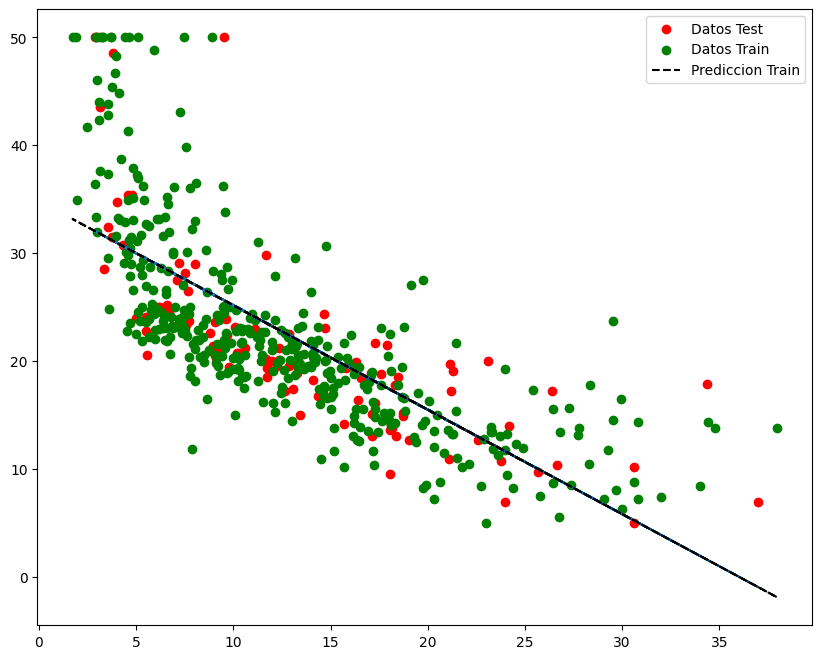

In [ ]:
plt.figure(figsize = (10,8))

plt.scatter(X_test_1, y_test,  color='red', label = 'Datos Test')
plt.plot(np.array(X_test_1), y_test_pred)

plt.scatter(X_train_1, y_train,  color='green', label = 'Datos Train')
plt.plot(np.array(X_train_1), y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.legend()
plt.show()

Ahora, agreguemos una feature más al modelo y hagamos lo mismo:

In [ ]:
X_train_2 = X_train[["LSTAT", "RM"]].copy()
X_test_2 = X_test[["LSTAT", "RM"]].copy()

reg = LinearRegression().fit(X_train_2, y_train)

Vemos que ya empieza a haber una diferencia significativa en los scores entre train y test. Por último, agreguemos todas las features y midamos los R squared:

In [ ]:
print(reg.score(X_train_2, y_train))
print(reg.score(X_test_2, y_test)) # es lo esperado que perfome un poco peor en test.

0.6501592679428922
0.5739577415025858


Vemos que nuestro modelo se ajusta bastante mejor a los datos de train que de test.

Si vemos en la documentación, hay 2 atributos que nos pueden interesar:

- coef_
- intercept_

¿ Qué significan cada uno ?

Imprimirlos

In [ ]:
reg.coef_

# y(F1,F2) = a*F1 + b*F2 + c

array([-0.63249856,  5.46509877])

In [ ]:
reg.intercept_

-3.841177079004872

Medir el mean squared error (Sklearn tiene la implementacion)

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_hat_2 = reg.predict(X_train_2)
y_test_hat_2 = reg.predict(X_test_2)

print('mse para train:', mean_squared_error(y_train, y_train_hat_2))
print('mse para test:', mean_squared_error(y_test, y_test_hat_2)) # el MC es peor en test esta bien. Tiene sentido que perfome peor c
# con los datos que no conoce

mse para train: 30.39185519321462
mse para test: 31.243290601783634


# Árboles de decision

Ahora, vamos a tratar de hacer lo mismo pero utilizando árboles de decision.

Vimos que sklearn tiene una implementación para esto: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Importar el decision tree regressor:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Vamos a hacer lo mismo que la clase pasada: Armar un listado de max_depths, entrenarlo y generar predicciones para cada elemento de la lista y decidir cuál es el mejor valor para max_depth.

En este caso, en lugar de medir el fscore, mediremos el MSE (mean squared error) para comparar con los resultados obtenidos en la regresión lineal

In [ ]:
max_depths = np.arange(1, 20)
train_scores = []
test_scores = []

In [ ]:
for i in max_depths:
    tree = DecisionTreeRegressor(max_depth=i)

    tree.fit(X_train, y_train)
    train_preds = tree.predict(X_train)
    test_preds = tree.predict(X_test)

    train_scores.append(mean_squared_error(y_train, train_preds))
    test_scores.append(mean_squared_error(y_test, test_preds))

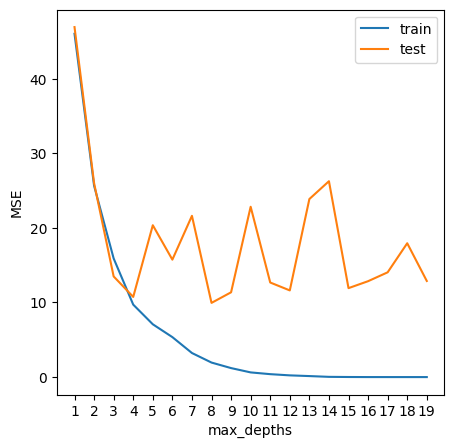

In [ ]:
plt.figure(figsize=(5,5))

plt.plot(max_depths, train_scores, label="train")
plt.plot(max_depths, test_scores,  label="test")
plt.xticks(max_depths)
plt.xlabel('max_depths')
plt.ylabel('MSE')
plt.legend()
plt.show()
# 4 serie el optimo, se tiende a tomar uno mas del optimo. kcy

Vemos como el error va disminuyendo a medida que aumenta el max depth, pero a partir de la profundidad 5, se separan ambas lineas (comienza a overfittear) por lo que avanzaremos con un max_depth=5.

Entrenar el árbol con max_depth=5 y medir el mean_squared_error:

In [ ]:
tree = DecisionTreeRegressor(max_depth=5,random_state=2)

tree.fit(X_train, y_train)

train_preds = tree.predict(X_train)
test_preds = tree.predict(X_test)


print(mean_squared_error(y_train, train_preds))
print(mean_squared_error(y_test, test_preds)) # se reduce un monton el error, mejoró

7.078696760120875
8.423318349352725


In [ ]:
print(mean_squared_error(y_train, train_preds))

7.078696760120875


In [ ]:
print(mean_squared_error(y_test, test_preds))

8.423318349352725


Vemos como podemos obtener mucho mejores resultados con un simple árbol de decisión.

# KNN

Ahora, probemos KNN.

Vimos que KNN se puede utilizar para regresión y lo que hace es tomar una media ponderada de los vecinos más cercanos.

Importemos knn regressor de sklearn:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # aca es importnate escalar

Recuerden que en KNN, es importante escalar los datos. Por lo tanto, vamos a escalar X_train y X_test con un standard scaler.

Escalar los datos:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Ahora, vamos a entrenar el modelo con distintos valores de K, al igual que hicimos con la profundidad de los arboles.

Entrenar knn con k desde 1 hasta 19 y decidir cuál es el mejor valor:

In [ ]:
K = np.arange(1, 20)
train_scores = []
test_scores = []

In [ ]:
for i in K:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    train_preds = knn.predict(X_train)
    test_preds = knn.predict(X_test)

    train_scores.append(np.sqrt(mean_squared_error(y_train, train_preds)))
    test_scores.append(np.sqrt(mean_squared_error(y_test, test_preds)))

Observando el gráfico, decidir el mejor valor de K y volver a entrenar knn.

Luego, medir el MSE y comparar con los modelos anteriores:

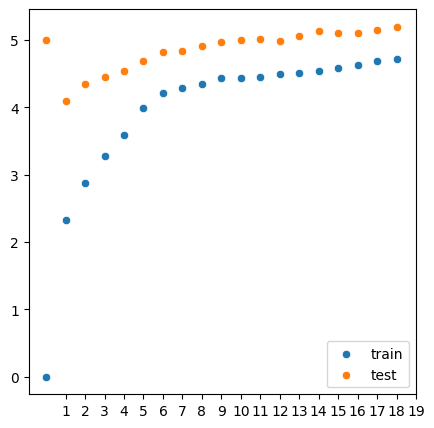

In [ ]:
plt.figure(figsize=(5,5))

sns.scatterplot(train_scores, label="train")
sns.scatterplot(test_scores,  label="test")
plt.xticks(max_depths)
plt.legend()
plt.show()

#plt.figure(figsize=(5,5))

#sns.scatterplot(train_scores, label="train")
#sns.scatterplot(test_scores,  label="test")
#plt.xticks(max_depths)
#plt.legend()
#plt.show()

In [ ]:
Kmodel = KNieghbourRegressor(max_depth=6,random_state=2) # esto para KNN

tree.fit(X_train, y_train)

train_preds = tree.predict(X_train)
test_preds = tree.predict(X_test)


print(mean_squared_error(y_train, train_preds))
print(mean_squared_error(y_test, test_preds))